In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing CSV files into pandas DataFrames
file1_path = '/Users/arindamdutta/Downloads/C6 Input Files/Dataset/fact_survey_responses.csv'
file2_path = '/Users/arindamdutta/Downloads/C6 Input Files/Dataset/dim_repondents.csv'
file3_path = '/Users/arindamdutta/Downloads/C6 Input Files/Dataset/dim_cities.csv'


df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)

In [2]:
print(df1.head())
print('-------------------------------------------------------------------------')
print("Shape is= ", df1.shape)

print(df2.head())
print('-------------------------------------------------------------------------')
print("Shape is= ", df2.shape)

print(df3.head())
print('-------------------------------------------------------------------------')
print("Shape is= ", df3.shape)

   Response_ID  Respondent_ID  Consume_frequency  \
0       103001         120031   2-3 times a week   
1       103002         120032  2-3 times a month   
2       103003         120033             Rarely   
3       103004         120034   2-3 times a week   
4       103005         120035              Daily   

                      Consume_time              Consume_reason Heard_before  \
0  To stay awake during work/study  Increased energy and focus          Yes   
1               Throughout the day        To boost performance           No   
2                  Before exercise  Increased energy and focus           No   
3  To stay awake during work/study        To boost performance           No   
4  To stay awake during work/study  Increased energy and focus          Yes   

  Brand_perception General_perception Tried_before  Taste_experience  ...  \
0          Neutral           Not sure           No                 5  ...   
1          Neutral           Not sure           No        

In [3]:
df1.columns

Index(['Response_ID', 'Respondent_ID', 'Consume_frequency', 'Consume_time',
       'Consume_reason', 'Heard_before', 'Brand_perception',
       'General_perception', 'Tried_before', 'Taste_experience',
       'Reasons_preventing_trying', 'Current_brands',
       'Reasons_for_choosing_brands', 'Improvements_desired',
       'Ingredients_expected', 'Health_concerns',
       'Interest_in_natural_or_organic', 'Marketing_channels',
       'Packaging_preference', 'Limited_edition_packaging', 'Price_range',
       'Purchase_location', 'Typical_consumption_situations'],
      dtype='object')

In [4]:
#check the null values
df1.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

In [5]:
df2.columns

Index(['Respondent_ID', 'Name', 'Age', 'Gender', 'City_ID'], dtype='object')

In [6]:
#check the null values
df2.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [7]:
df3.columns

Index(['City_ID', 'City', 'Tier'], dtype='object')

In [8]:
#check the null values
df3.isnull().sum()

City_ID    0
City       0
Tier       0
dtype: int64

In [9]:
#Checking if any duplicate row is there in the dataset
df1.duplicated().sum()

0

In [10]:
#Checking if any duplicate row is there in the dataset
df2.duplicated().sum()

0

In [11]:
#Checking if any duplicate row is there in the dataset
df3.duplicated().sum()

0

In [12]:
#Checking the continuos and the Categorical Columns
df1.dtypes

Response_ID                        int64
Respondent_ID                      int64
Consume_frequency                 object
Consume_time                      object
Consume_reason                    object
Heard_before                      object
Brand_perception                  object
General_perception                object
Tried_before                      object
Taste_experience                   int64
Reasons_preventing_trying         object
Current_brands                    object
Reasons_for_choosing_brands       object
Improvements_desired              object
Ingredients_expected              object
Health_concerns                   object
Interest_in_natural_or_organic    object
Marketing_channels                object
Packaging_preference              object
Limited_edition_packaging         object
Price_range                       object
Purchase_location                 object
Typical_consumption_situations    object
dtype: object

In [13]:
#Checking the continuos and the Categorical Columns
df2.dtypes

Respondent_ID     int64
Name             object
Age              object
Gender           object
City_ID          object
dtype: object

In [14]:
#Checking the continuos and the Categorical Columns
df3.dtypes

City_ID    object
City       object
Tier       object
dtype: object

Awareness Percentage:
Heard_before
No     55.53
Yes    44.47
Name: count, dtype: float64


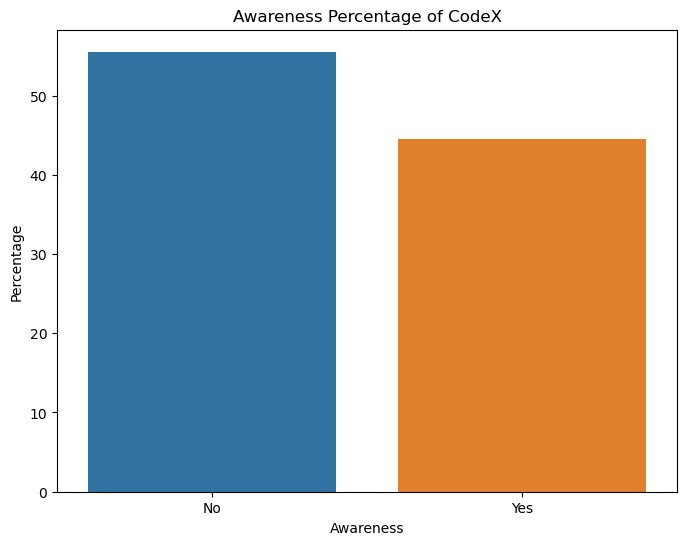

In [16]:
## Calculate Awareness Percentage
awareness_percentage = (df1['Heard_before'].value_counts() / len(df1)) * 100
print("Awareness Percentage:")
print(awareness_percentage)

# Visualize Awareness
plt.figure(figsize=(8, 6))
sns.barplot(x=awareness_percentage.index, y=awareness_percentage.values)
plt.title('Awareness Percentage of CodeX')
plt.xlabel('Awareness')
plt.ylabel('Percentage')
plt.show()

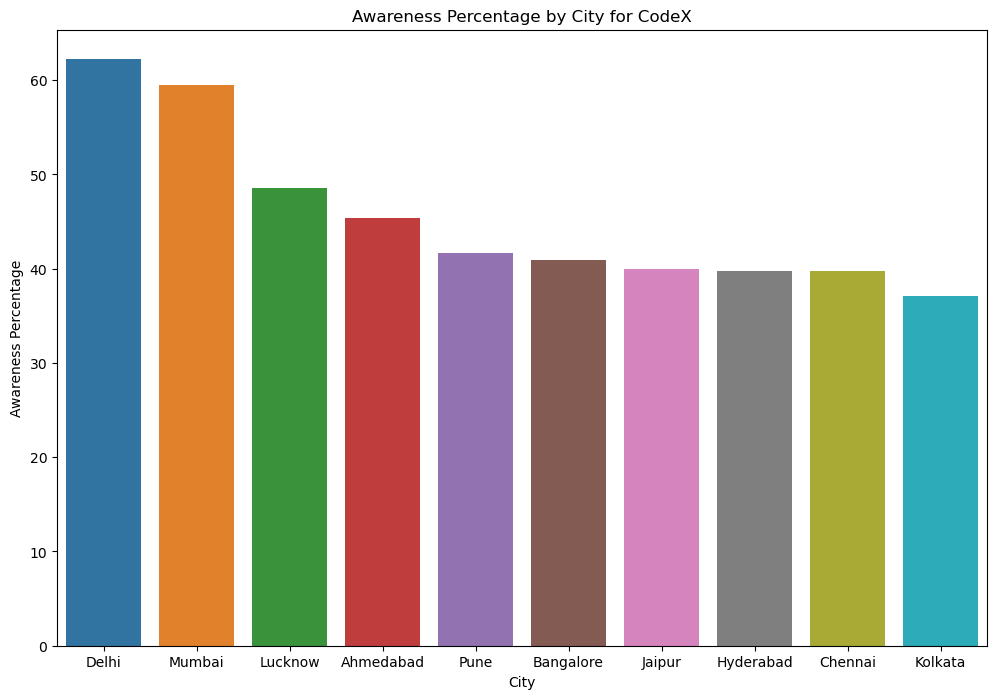

In [21]:
merged_df = pd.merge(df1, df2, on='Respondent_ID')
final_df = pd.merge(merged_df, df3, on='City_ID')

# Calculate Awareness Percentage by City
awareness_by_city = final_df.groupby('City')['Heard_before'].value_counts(normalize=True).unstack().fillna(0) * 100

# Plot Awareness by City
plt.figure(figsize=(12, 8))
sns.barplot(data=awareness_by_city, x=awareness_by_city.index, y='Yes', order=awareness_by_city.sort_values(by='Yes', ascending=False).index)
plt.title('Awareness Percentage by City for CodeX')
plt.xlabel('City')
plt.ylabel('Awareness Percentage')
plt.show()

Percentage of Respondents who have Tried CodeX:
Tried_before
No     51.19
Yes    48.81
Name: count, dtype: float64


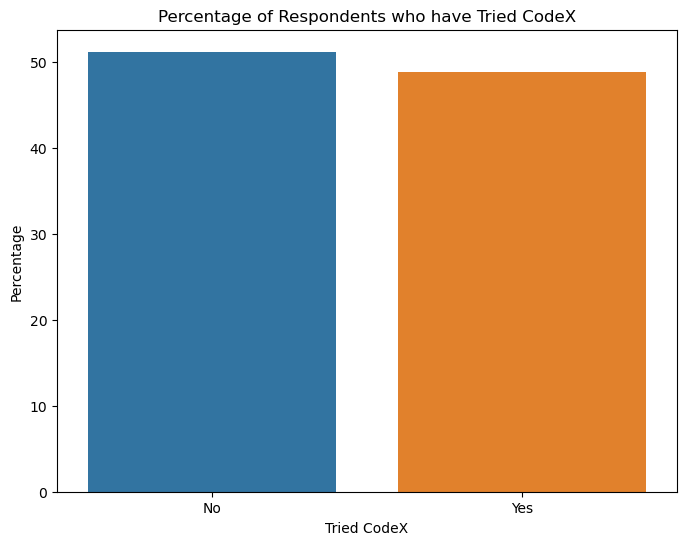

In [23]:
# Calculate Percentage of Respondents who have Tried CodeX
tried_percentage = (df1['Tried_before'].value_counts() / len(df1)) * 100
print("Percentage of Respondents who have Tried CodeX:")
print(tried_percentage)

# Visualize Tried Percentage
plt.figure(figsize=(8, 6))
sns.barplot(x=tried_percentage.index, y=tried_percentage.values)
plt.title('Percentage of Respondents who have Tried CodeX')
plt.xlabel('Tried CodeX')
plt.ylabel('Percentage')
plt.show()

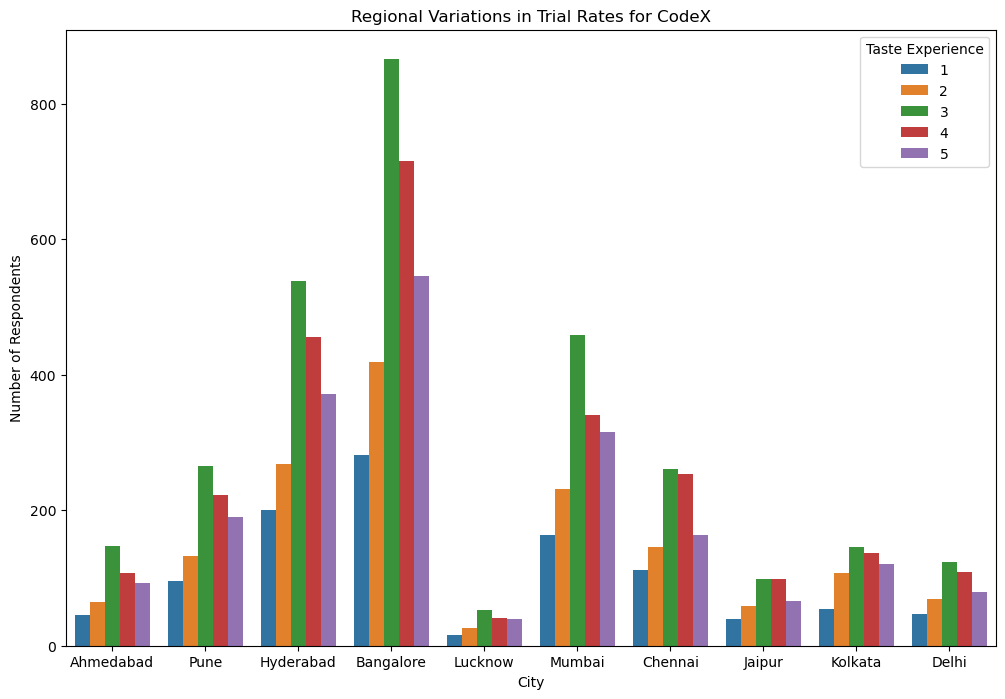

In [24]:
merged_df = pd.merge(df1, df2, on='Respondent_ID')
final_df = pd.merge(merged_df, df3, on='City_ID')

# Plot Regional Variations in Trial Rates
plt.figure(figsize=(12, 8))
sns.countplot(data=final_df, x='City', hue='Taste_experience')
plt.title('Regional Variations in Trial Rates for CodeX')
plt.xlabel('City')
plt.ylabel('Number of Respondents')
plt.legend(title='Taste Experience', loc='upper right')
plt.show()

Potential Growth Cities based on Brand Perception:
Index(['Delhi', 'Mumbai', 'Jaipur', 'Pune', 'Lucknow', 'Ahmedabad', 'Chennai',
       'Hyderabad', 'Bangalore', 'Kolkata'],
      dtype='object', name='City')


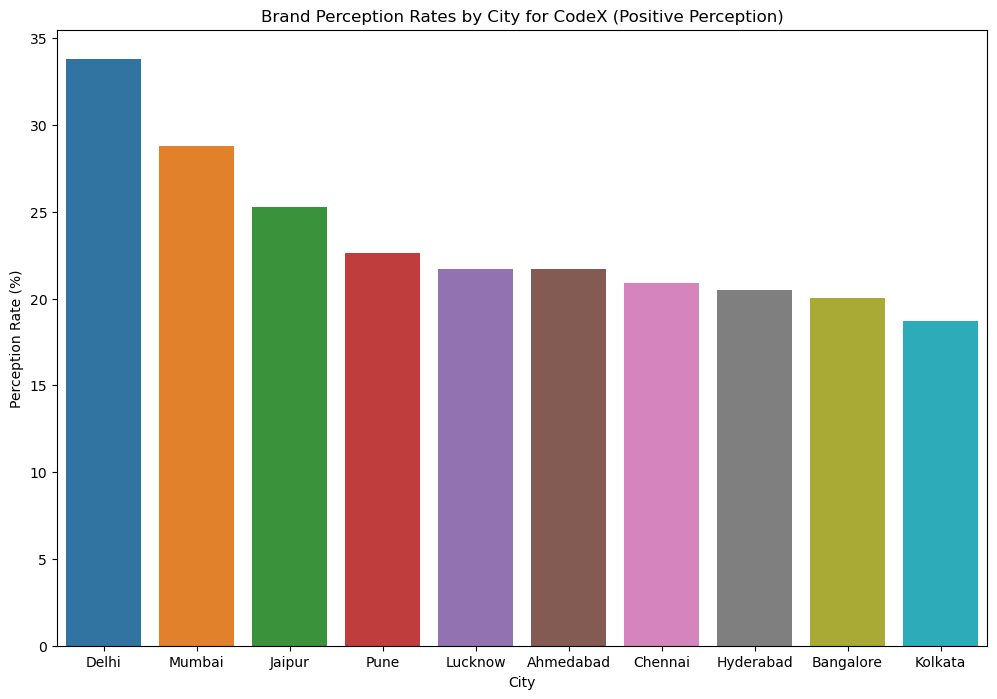

In [26]:
merged_df = pd.merge(df1, df2, on='Respondent_ID')
final_df = pd.merge(merged_df, df3, on='City_ID')

# Calculate Brand Perception Rates by City
perception_rates_by_city = final_df.groupby('City')['Brand_perception'].value_counts(normalize=True).unstack().fillna(0) * 100

# Identify Potential Growth Cities
potential_growth_cities = perception_rates_by_city['Positive'].sort_values(ascending=False).index

# Display Potential Growth Cities
print("Potential Growth Cities based on Brand Perception:")
print(potential_growth_cities)

# Visualize Brand Perception Rates by City
plt.figure(figsize=(12, 8))
sns.barplot(data=perception_rates_by_city, x=perception_rates_by_city.index, y='Positive', order=potential_growth_cities)
plt.title('Brand Perception Rates by City for CodeX (Positive Perception)')
plt.xlabel('City')
plt.ylabel('Perception Rate (%)')
plt.show()

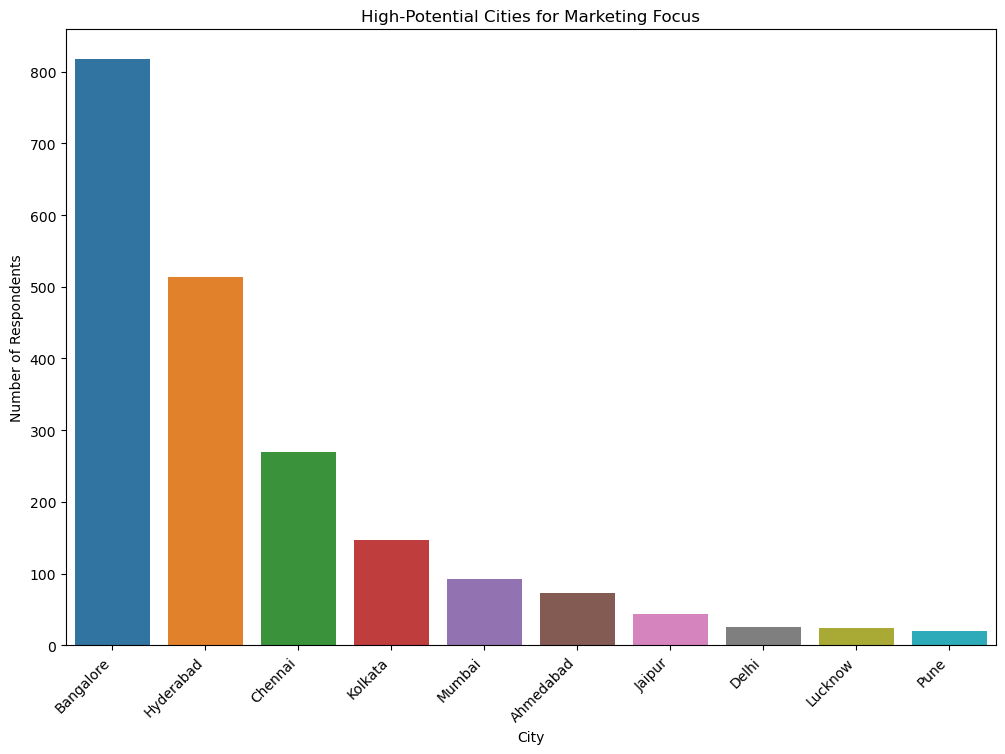

In [68]:
# Merge the dataframes on 'city_id' and 'city'
merged_df = pd.merge(df1, df2, on='Respondent_ID', how='left')
merged_df = pd.merge(merged_df, df3, on='City_ID', how='left')

# Filter data for respondents who have heard and tried the energy drink
potential_df = merged_df[(merged_df['Heard_before'] == 'Yes') & (merged_df['Tried_before'] == 'Yes')]

# Calculate the count of respondents in each city
city_counts = potential_df['City'].value_counts()

# Plotting a bar chart to visualize potential cities
plt.figure(figsize=(12, 8))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('High-Potential Cities for Marketing Focus')
plt.xlabel('City')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

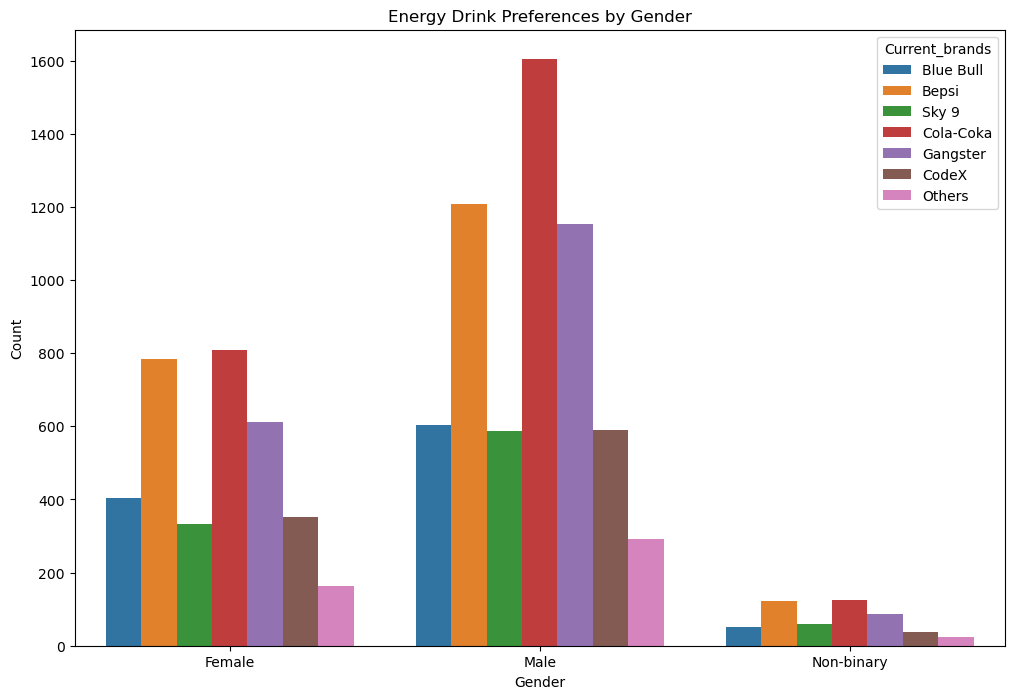

In [69]:
merged_df = pd.merge(df1, df2, on='Respondent_ID')

# Plotting preferences by gender and age
plt.figure(figsize=(12, 8))
sns.countplot(x='Gender', hue='Current_brands', data=merged_df)
plt.title('Energy Drink Preferences by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

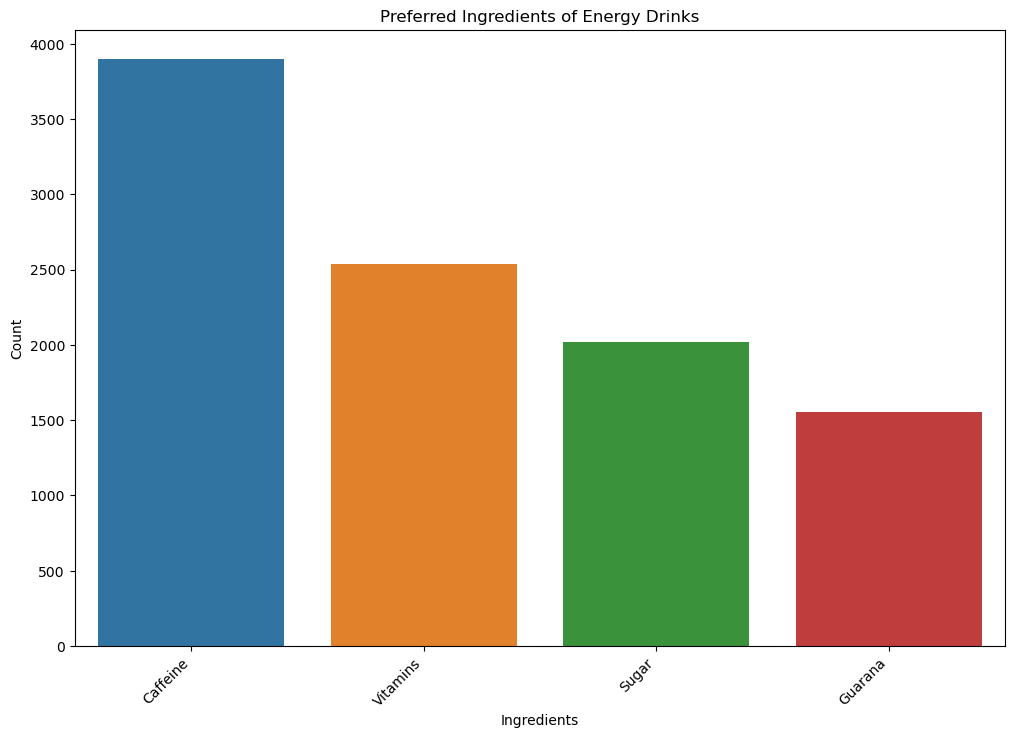

In [48]:
ingredients_counts = df1['Ingredients_expected'].value_counts()

# Plotting preferred ingredients
plt.figure(figsize=(12, 8))
sns.barplot(x=ingredients_counts.index, y=ingredients_counts.values)
plt.title('Preferred Ingredients of Energy Drinks')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

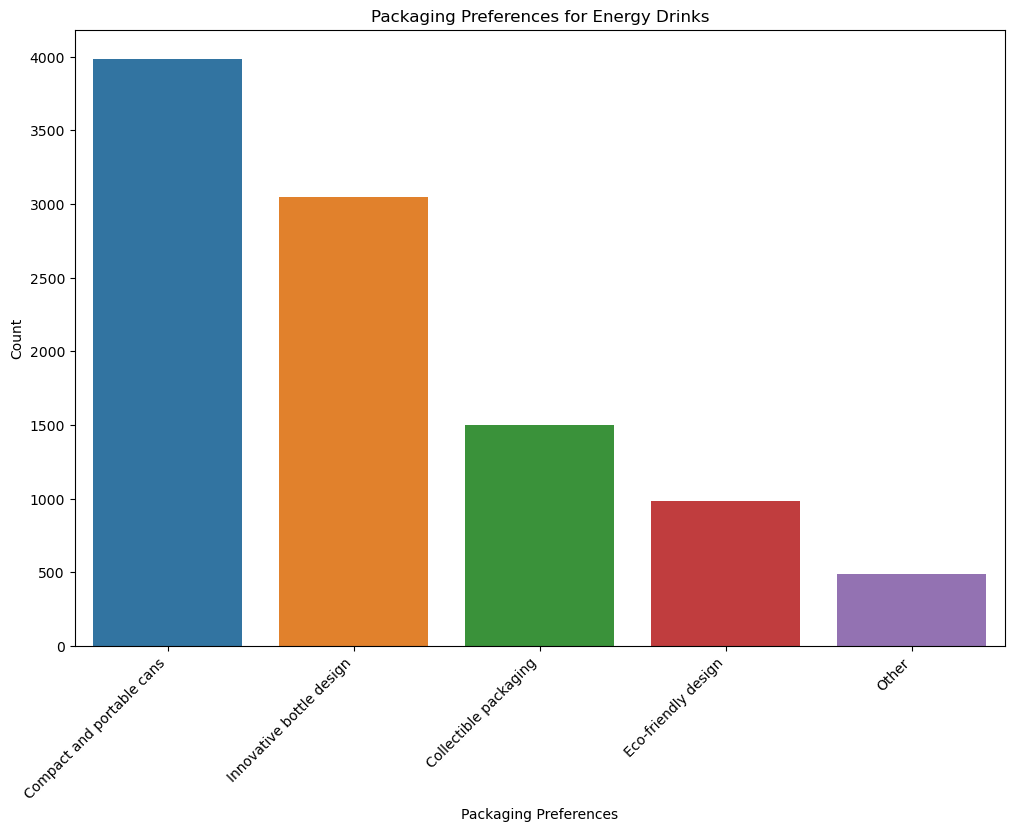

In [49]:
packaging_counts = df1['Packaging_preference'].value_counts()

# Plotting packaging preferences
plt.figure(figsize=(12, 8))
sns.barplot(x=packaging_counts.index, y=packaging_counts.values)
plt.title('Packaging Preferences for Energy Drinks')
plt.xlabel('Packaging Preferences')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

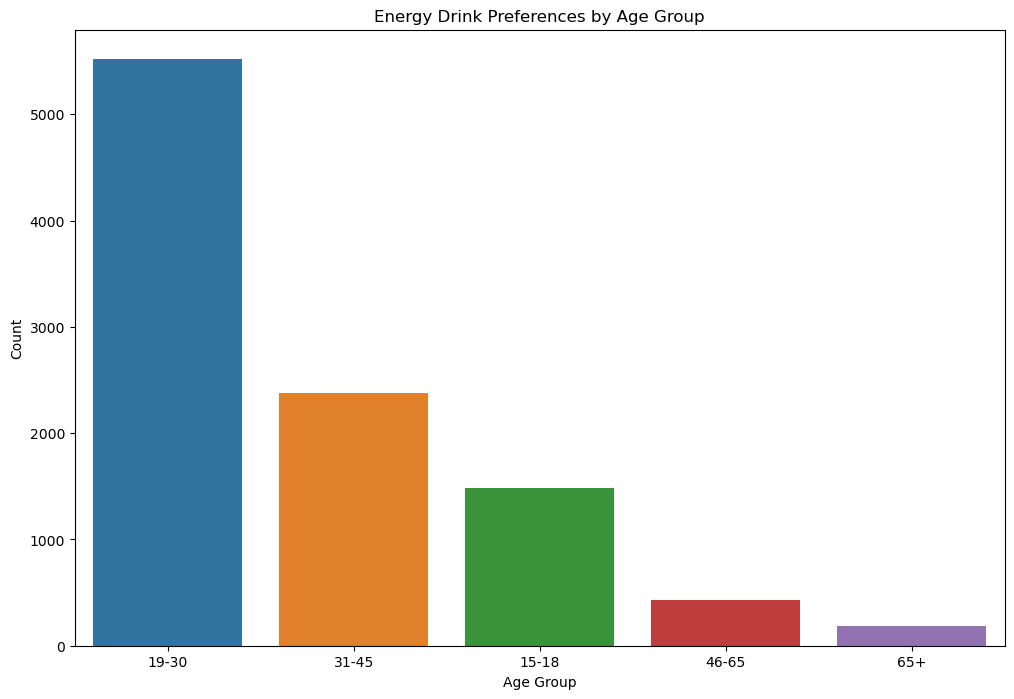

In [52]:
age_group_counts = df2['Age'].value_counts()

# Plotting preferences by age group
plt.figure(figsize=(12, 8))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Energy Drink Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


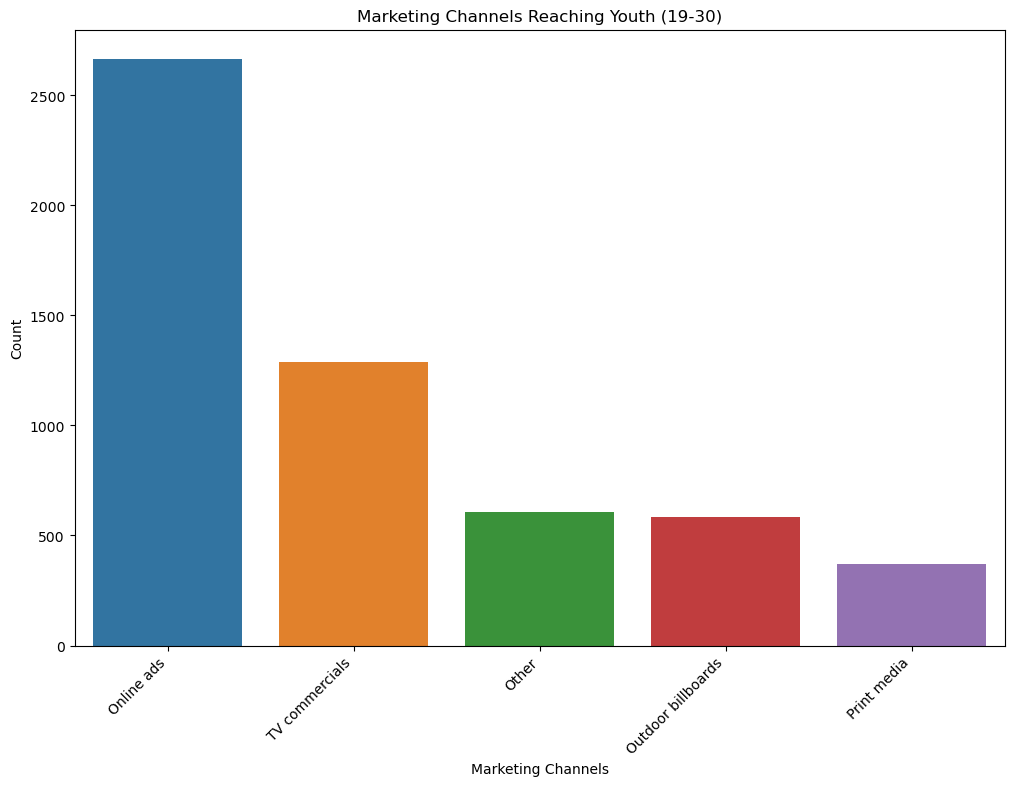

In [59]:
merged_df = pd.merge(df1, df2, on='Respondent_ID', how='left')

# Filter data for the youth age group (19-30)
youth_data = merged_df[merged_df['Age'] == '19-30']

# Calculate the count of marketing channels for youth
marketing_channel_counts = youth_data['Marketing_channels'].value_counts()

# Plotting marketing channels for youth
plt.figure(figsize=(12, 8))
sns.barplot(x=marketing_channel_counts.index, y=marketing_channel_counts.values)
plt.title('Marketing Channels Reaching Youth (19-30)')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

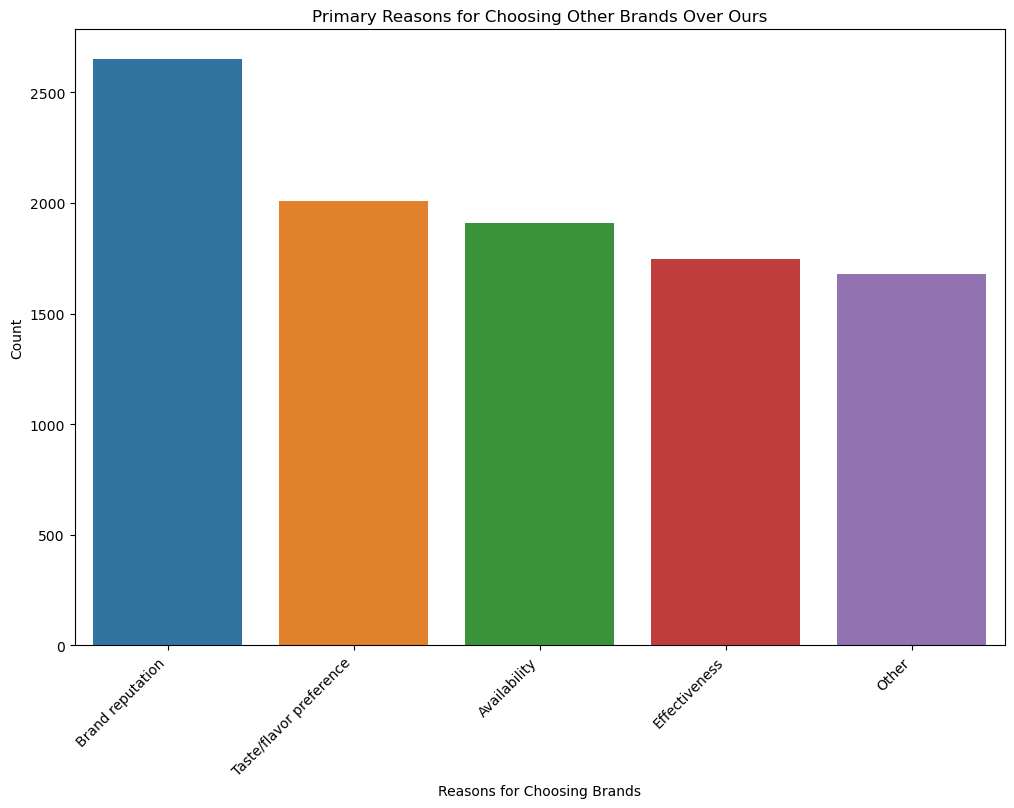

In [61]:
reasons_counts = df1['Reasons_for_choosing_brands'].value_counts()

# Plotting primary reasons for brand preference
plt.figure(figsize=(12, 8))
sns.barplot(x=reasons_counts.index, y=reasons_counts.values)
plt.title('Primary Reasons for Choosing Other Brands Over Ours')
plt.xlabel('Reasons for Choosing Brands')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

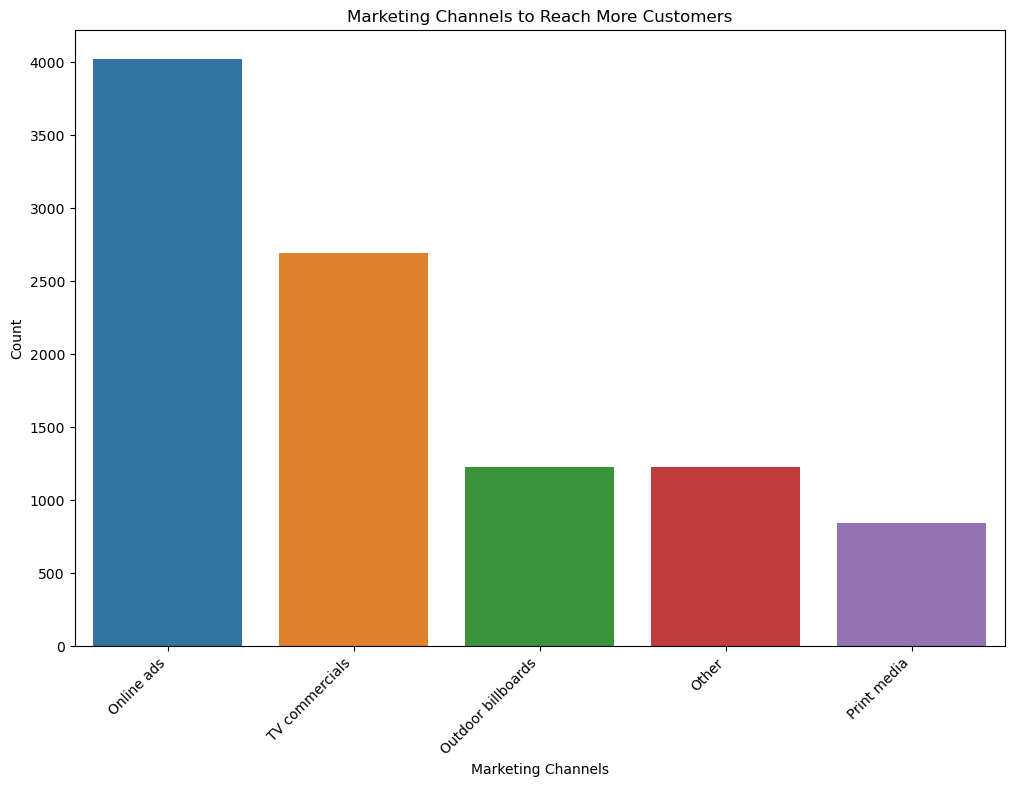

In [62]:
marketing_channel_counts = df1['Marketing_channels'].value_counts()

# Plotting marketing channels to reach more customers
plt.figure(figsize=(12, 8))
sns.barplot(x=marketing_channel_counts.index, y=marketing_channel_counts.values)
plt.title('Marketing Channels to Reach More Customers')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

<Figure size 1200x800 with 0 Axes>

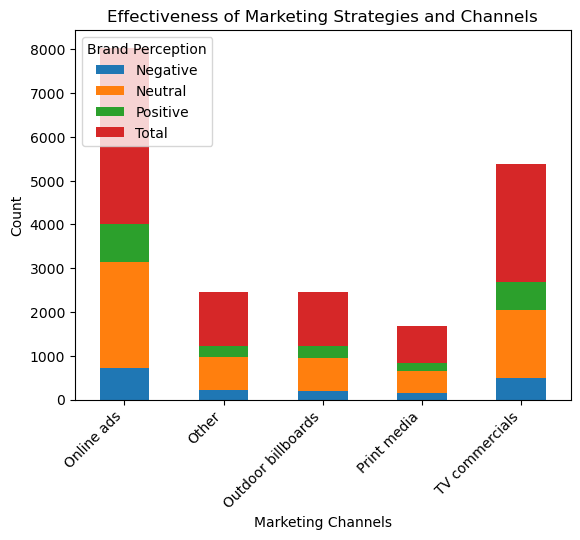

In [63]:
cross_table = pd.crosstab(df1['Marketing_channels'], df1['Brand_perception'], margins=True, margins_name='Total')

# Plotting a stacked bar chart to visualize effectiveness
plt.figure(figsize=(12, 8))
cross_table.drop('Total', axis=0).plot(kind='bar', stacked=True)
plt.title('Effectiveness of Marketing Strategies and Channels')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Brand Perception', loc='upper left')
plt.show()

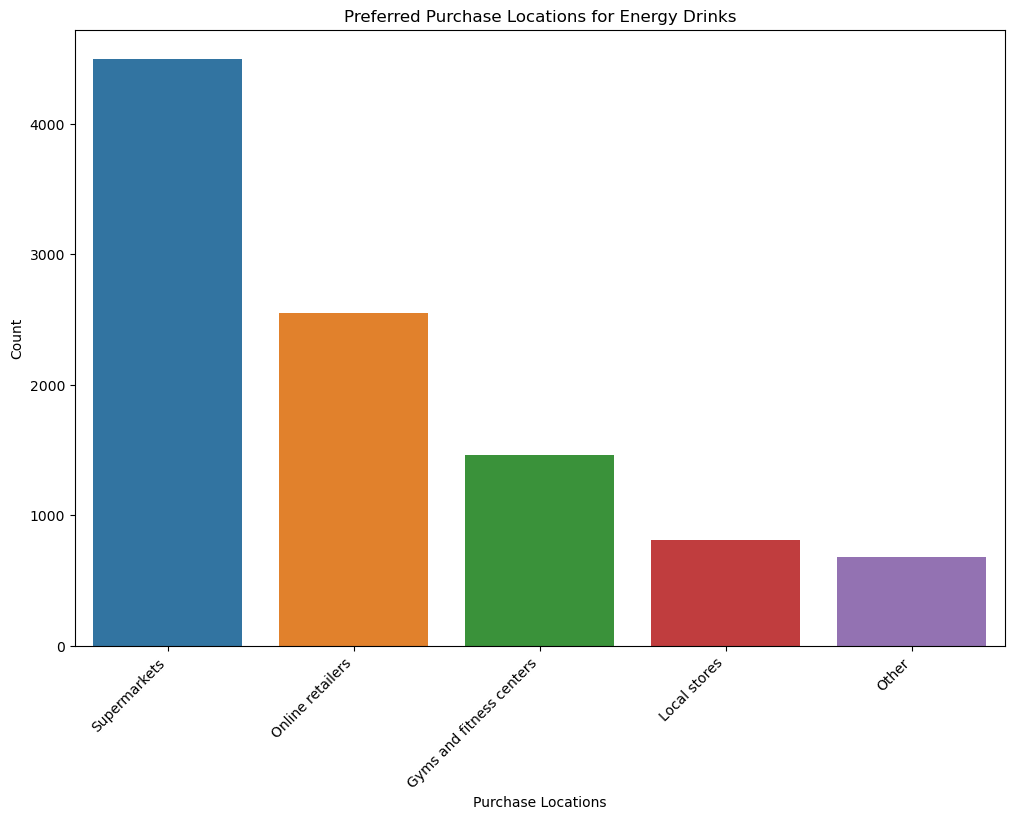

In [64]:
purchase_location_counts = df1['Purchase_location'].value_counts()

# Plotting preferences for purchase locations
plt.figure(figsize=(12, 8))
sns.barplot(x=purchase_location_counts.index, y=purchase_location_counts.values)
plt.title('Preferred Purchase Locations for Energy Drinks')
plt.xlabel('Purchase Locations')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

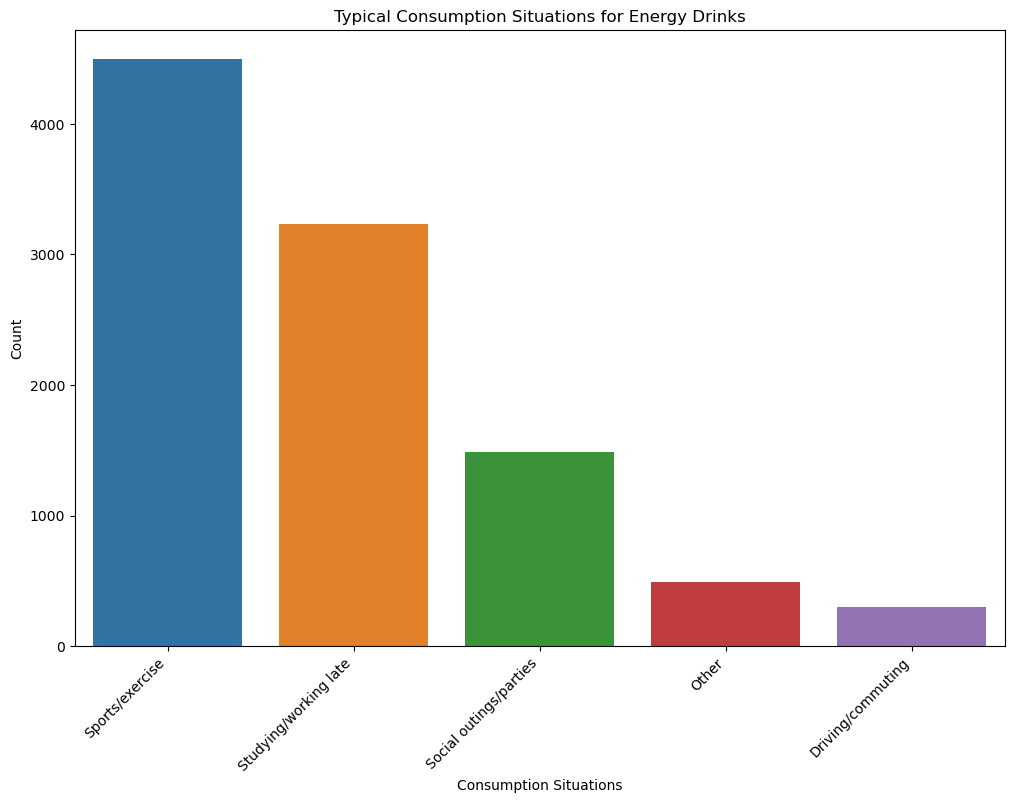

In [65]:
consumption_situations_counts = df1['Typical_consumption_situations'].value_counts()

# Plotting typical consumption situations
plt.figure(figsize=(12, 8))
sns.barplot(x=consumption_situations_counts.index, y=consumption_situations_counts.values)
plt.title('Typical Consumption Situations for Energy Drinks')
plt.xlabel('Consumption Situations')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

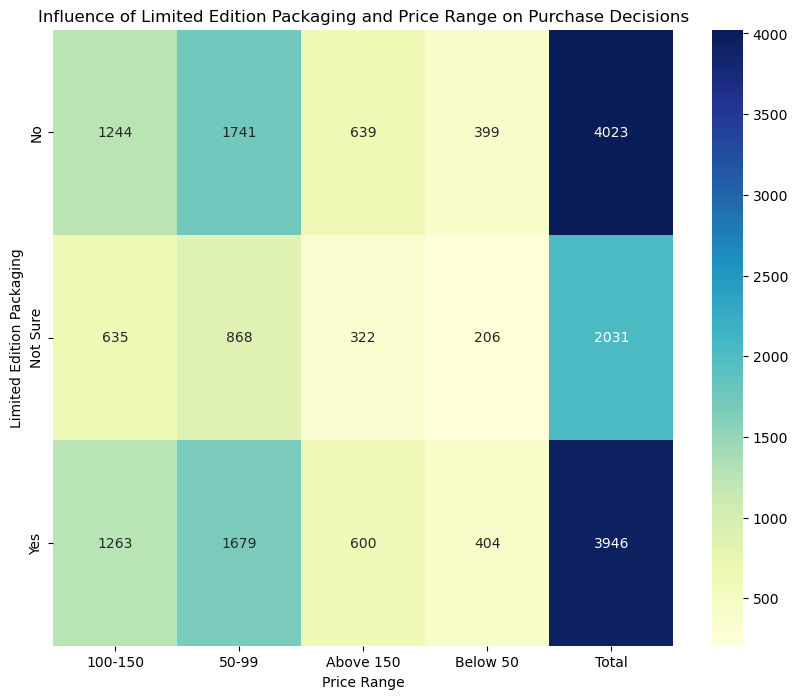

In [66]:
cross_table = pd.crosstab(df1['Limited_edition_packaging'], df1['Price_range'], margins=True, margins_name='Total')

# Plotting a heatmap to visualize the relationship between limited edition packaging and price range
plt.figure(figsize=(10, 8))
sns.heatmap(cross_table.drop('Total', axis=0), annot=True, cmap="YlGnBu", fmt="d")
plt.title('Influence of Limited Edition Packaging and Price Range on Purchase Decisions')
plt.xlabel('Price Range')
plt.ylabel('Limited Edition Packaging')
plt.show()

#### Conclusion:- The observations highlight various insights into consumer preferences and market trends for energy drinks. Key findings include age group preferences, effective marketing channels, and factors influencing purchase decisions. Understanding these insights can inform strategic decisions in product development, marketing campaigns, and brand positioning to better meet consumer needs and drive business growth.